# Quantum Algorithms

Can we design algorithms that have inherent noise resilient? 

## Variational (Parameterized) Circuits

> Sometimes also called _quantum machine learning_

Idea: make the gates in a quantum computer dependent on tunable parameters. Then use classical machine learning to optimize these parameters subject to some _cost function_.

```{image} varitional-circuit.png
:align: center
```

```{note}

$$
\begin{align}
\bra{\psi(\theta)} U \ket{\psi(\theta)} &= \sum_{i,j} \bra{\psi(\theta)} \ket{\lambda_i}\bra{\lambda_i} U \ket{\lambda_j}\bra{\lambda_j} \ket{\psi(\theta)}\\
&= \sum_\lambda \lambda |\bra{\psi_\lambda}\ket{\psi(\theta)}|^2 \ge \sum E_0 \bra{\psi_\lambda}\ket{\psi(\theta)} = E_0 \bra{\psi(\theta)}\ket{\psi(\theta)}
\end{align}
$$

```

## Python Example

Let us find the eigenvalues of the Hadamard gate $H$. We us a parameterized gate $U(\theta, \phi, \lambda)$

$$
U(\theta, \phi, \lambda) = \begin{bmatrix} \cos(\theta/2) & -e^{i\lambda} \sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda + i \phi} \cos(\theta/2)
\end{bmatrix}
$$

to prepare the state $\ket{\psi} = U(\theta, \phi, \lambda)\ket{0}$. We then calculate the loss function as 

$$
\mathcal{F} = \bra{\psi} H \ket{\psi}
$$ (eq:loss-function)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def U(theta, phi, lam):
    U = np.array([
            [np.cos(theta/2), -np.exp(-1j * lam) * np.sin(theta/2)],
            [np.exp(1j * phi) * np.sin(theta/2), np.exp(1j * (phi + lam) * np.cos(theta/2))]
        ])
    return U

H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


Let us plot the loss landscape.

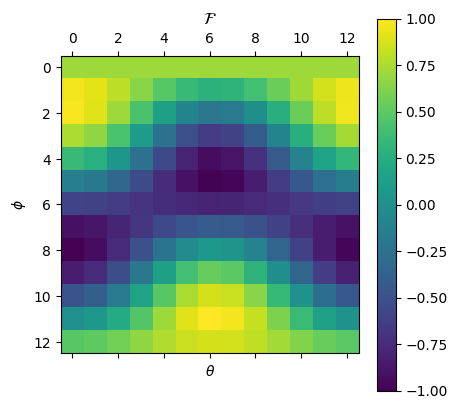

In [2]:
psi0 = np.array([[1], [0]])

def exp_val(U):

    psi_f = U @ psi0
    val = psi_f.conj().T @ H @ psi_f
    return val.real

thetas = np.arange(0, 2 * np.pi, 0.5)
phis = np.arange(0, 2 * np.pi, 0.5)

result = np.zeros((len(thetas), len(phis)))

for i, theta in enumerate(thetas):
    for j, phi in enumerate(phis):

        lam = 0
        result[i, j] = exp_val(U(theta, phi, lam))

plt.matshow(result, vmin=-1.0, vmax=1.0)
plt.title(r"$\cal F$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\phi$")
# plt.xticks(range(thetas), thetas)
plt.colorbar()
plt.show()


In [3]:
where = np.argwhere(result)
theta_min, phi_min = where[np.argmin(result)]
theta_max, phi_max = where[np.argmax(result)]

print(f"The min/max values: {result[theta_min, phi_min]}, {result[theta_max, phi_max]}")

psi_min = U(theta_min, phi_min, 0) @ psi0
psi_max = U(theta_max, phi_max, 0) @ psi0

print(f"({thetas[theta_min]:.3f},{phis[phi_min]:.3f}) {result[theta_min, phi_min]:.3f}: \n{psi_min}\n")
print(f"({thetas[theta_max]:.3f},{phis[phi_max]:.3f}) {result[theta_max, phi_max]:.3f}: \n{psi_max}\n")

The min/max values: -0.9973360132431252, 0.9950048847599382
(4.000,0.000) -0.997: 
[[-0.65364362+0.j]
 [-0.7568025 +0.j]]

(5.500,3.000) 0.995: 
[[ 0.70866977+0.j       ]
 [-0.67743886+0.1971389j]]



## Tips and Tricks

*Post-selection*:

> Conditioning on the outcome of a measurement on some other qubit.

Good way to simulate having good control of the quantum computer, particularly for small systems. Not practical for large system since you may need to condition on an outcome that has very small probability of success.

Example: Suppose we are finding the expectation value of some of some observable $\cal O$. But we know $\cal O$ has some commutation property with another observable $\cal \Lambda$. Therefore we have a constraint on the possible expectation values produced from $\cal O$ subject to $\cal \Lambda$.